# Exploring DrivePro GPS format

The Transcend DrivePro 220 exports its videos in Quicktime MOV format, in a way that also includes GPS information every second in the video. This information can be viewed using their Windows and/or Mac apps, but not exported. This notebook will attempt to get to the bottom of how the GPS data is stored, so I can use this dashcam to provide data to the OpenStreetView project.

The Quicktime `.mov` files exported by the dashcam do appear to have a custom tag, which can be extracted using the `Unknown_gps` tag using `exiftool` (or `pyexiftool` in this case). Let's choose a video ([this one](sample/2017_0706_093256_013.MOV)), and see how far we can get:

In [1]:
video = 'sample/2017_0706_093256_013.MOV'

In [2]:
# use exiftool to load the gps tag
import exiftool
import base64
import numpy as np
with exiftool.ExifTool() as et:
    data = et.get_tag('Unknown_gps', video)
# decode the base64 data to a byte-string
assert data.startswith('base64:')
data = base64.b64decode(data[len('base64:'):])
# convert the byte string to a numpy array
data = np.frombuffer(data, dtype=np.uint8)
# and reshape into 8 bytes per sample
data = data.reshape((-1,8))

Now that we have the data, let's see if anything useful is apparent

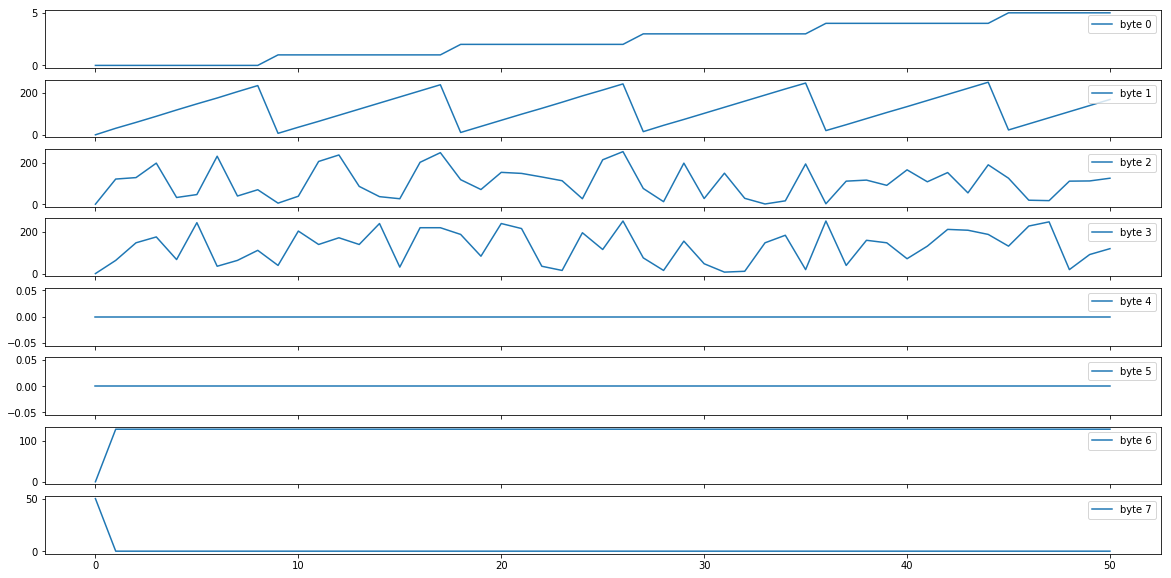

In [3]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(data.shape[1], 1, figsize=(20,10), sharex='col')
for i in range(data.shape[1]):
    ax[i].plot(data[:,i])
    ax[i].legend(['byte {}'.format(i)], loc='upper right')

We can see that byte 0 and 1 (of every 8 bytes) appears to be related to a timestamp, and bytes 4-7 appear to largely be unchanging.

Let's have a closer look at bytes 2 and 3 and see if we can see anything in them:

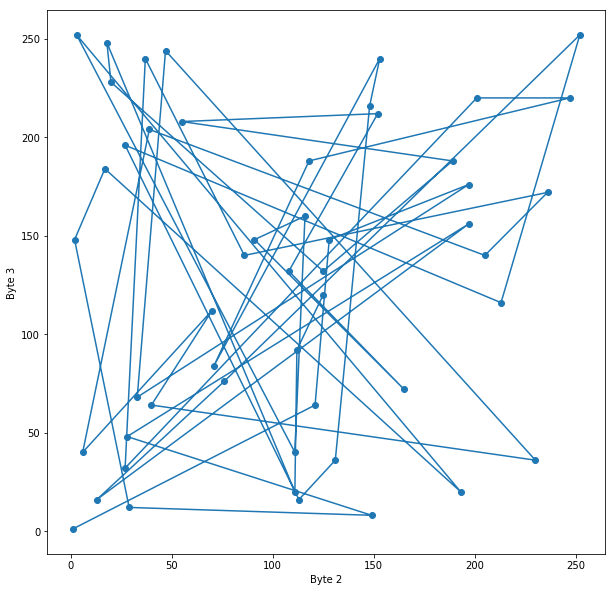

In [4]:
f, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(data[:,2],data[:,3],'o-')
ax.set_xlabel('Byte 2')
ax.set_ylabel('Byte 3')

Given that the driving in the video is largely in a straight line, this certainly does not linearly correspond to any probably GPS coordinates.